<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/lab_solutions/Labs/Lab04_AutoDiff_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Automatic Differentiation

Task:
- in Python using either JAX or PyTorch, define a function that is mathematically equivalent to $f(x)=x$ yet its AutoDiff "derivative" is
$$f'(x)=\begin{cases} 1 & x \neq 0 \\ -17 & x=0\end{cases}$$

Learning objectives
- TBD

Copyright 2025, Department of Applied Mathematics, University of Colorado Boulder. Released under the BSD 3-Clause License

Note: unlike some of the other demos, for this demo, we *encourage* you to use Colab, since Colab has the main autodiff packages pre-installed (jax and PyTorch)

If you want more of this lab, see [SciML: Lab 4](https://github.com/cu-applied-math/SciML-Class/blob/main/Labs/lab04.md) and its [SciML: Lab 4 solutions](https://github.com/cu-applied-math/SciML-Class/blob/lab_solutions/Labs/lab04_AD.ipynb) which adds a few tasks

## Solution using JAX

In [48]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from matplotlib import pyplot as plt
import numpy as np

In [49]:
# TODO, give them an example of jax.lax.cond to make a piecewise constant function...
def f(x):
  # if x == 0:  # JAX cannot handle a plain "if" statement, use jax.lax.cond
  #   return -17*x
  # else:
  #   return x
  return jax.lax.cond( x==0, lambda : -17*x, lambda : x)

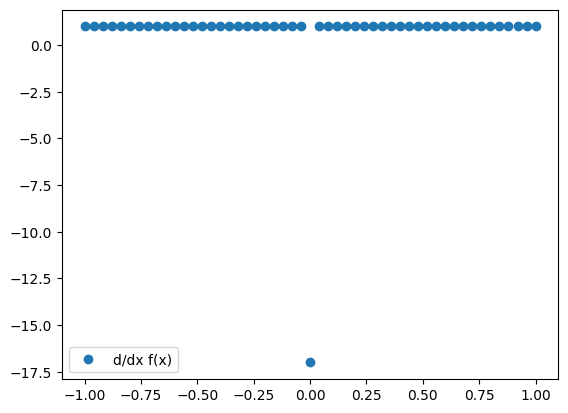

In [50]:
fprime = vmap(grad(f))
# fprime = grad(f) # doesn't work
# x = jnp.linspace(-1,1,11)
xGrid = np.linspace(-1,1,51)
x = jnp.array(xGrid)
plt.plot(x,fprime(x),'o',label='d/dx f(x)')
plt.legend()
plt.show()

## Solution in PyTorch

In [37]:
# Do it in PyTorch
import torch
from matplotlib import pyplot as plt
import numpy as np

In [59]:
def f(x):
  if x == 0:
    return -17*x
  else:
    return x

In [55]:
def find_derivative(fcn,xGrid):
    x      = torch.zeros(1, requires_grad = True)
    deriv = torch.zeros_like(xGrid)
    for i,xval in enumerate(xGrid):
        x.data = xval
        fx = fcn(x)
        fx.backward()
        deriv[i] = x.grad.data
        x.grad.data.zero_()
    return deriv

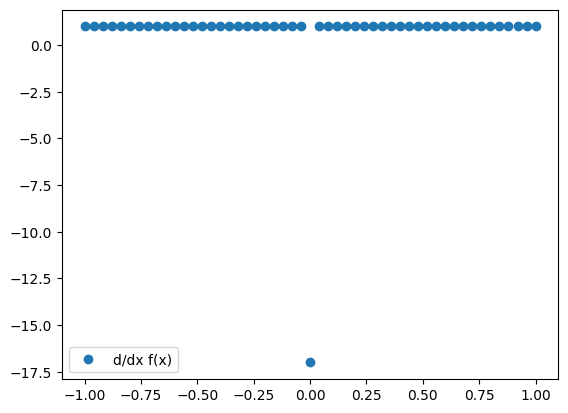

In [58]:
xGrid = np.linspace(-1,1,51)
x = torch.tensor(xGrid)
# x = torch.linspace(-1,1,51) # doesn't work
df = find_derivative(f,x)
plt.plot(x,df,'o',label='d/dx f(x)')
plt.legend()
plt.show()